In [2]:
from astropy import units as u
import setigen as stg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from blimpy import Waterfall
import h5py
import matplotlib.gridspec as gridspec
%matplotlib inline

## 6-type dataset (same drift)

In [19]:
%%time
# generating and saving clean

with h5py.File('even_types_30000.h5', 'w') as hf:
    # fig, axs = plt.subplots(4, 4, figsize=(15, 10))
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_width = np.random.uniform(50, 60)
            if random_drift>0:
                random_start = 20
            else:      
                random_start = 110

            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))

            filename = 'clean_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            hf.create_dataset(filename, data=frame.waterfall.data)
            
# generating and saving noisy
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_SNR = 50
            random_width = 50
            if random_drift>0:
                random_start = 20
            else:      
                random_start = 110
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                      tchans=128*u.pixel, # number of time samples
                      df=2.7939677238464355*u.Hz, # frequency resolution
                      dt=18.253611008*u.s, # time resolution
                      fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame.add_noise(x_mean=10, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(level=frame.get_intensity(snr=random_SNR)),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))

            filename = 'noisy_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            hf.create_dataset(filename, data=frame.waterfall.data)
    
    hf.close() 

CPU times: user 1min 10s, sys: 4.69 s, total: 1min 15s
Wall time: 1min 15s


In [ ]:
plt.subplots(4, 4, figsize=(8, 8))
h5_filename = 'even_types_30000.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([0,1,2,3,4,5])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb)))
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray')  
    plt.axis('off') 
hf.close()

## 6-type-various(various drift rates)

In [5]:
%%time
# generating and saving clean

with h5py.File('even_types_vary_30000.h5', 'w') as hf:
    rd = -1
    random_SNR = 50
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_width = np.random.uniform(50, 60)
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)

            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))

            filename = 'clean_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            #img[24:44,:] = 0
            hf.create_dataset(filename, data=img)
            
# generating and saving noisy
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_SNR = 50
            random_width = 50
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame.add_noise(x_mean=10, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(level=frame.get_intensity(snr=random_SNR)),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))

            filename = 'noisy_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            #img[24:44,:] = 0
            hf.create_dataset(filename, data=img)
    
    hf.close() 

CPU times: user 1min 52s, sys: 10.4 s, total: 2min 2s
Wall time: 2min 27s


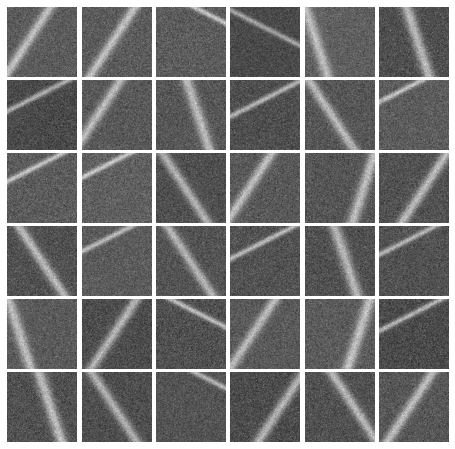

In [7]:
plt.subplots(4, 4, figsize=(8, 8))
h5_filename = 'even_types_vary_30000.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([0,1,2,3,4,5])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb)))
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray')  
    plt.axis('off') 
hf.close()

## Cadence dataset (6-type, various drift rate, bands)

In [19]:
%%time
# generating and saving clean

with h5py.File('6_band_noise_30000.h5', 'w') as hf:
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_width = np.random.uniform(50, 60)
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)

            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))
            frame2 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame2.add_noise(x_mean=0.5, x_std = 0.1, noise_type = np.random.choice(['normal', 'chi2']))
            frame3 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=23*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame3.add_noise(x_mean=0.5, x_std = 0.1, noise_type = np.random.choice(['normal', 'chi2']))
            filename = 'clean_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            img[21:42,:] = frame2.get_data().reshape(21,1,128)
            img[63:84,:] = frame2.get_data().reshape(21,1,128)
            img[105:,:] = frame3.get_data().reshape(23,1,128)
            hf.create_dataset(filename, data=img)
            
# generating and saving noisy
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_SNR = 50
            random_width = 50
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame.add_noise(x_mean=10, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(level=frame.get_intensity(snr=random_SNR)),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))
            frame2 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame2.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            frame3 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=23*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame3.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            filename = 'noisy_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            img[21:42,:] = frame2.get_data().reshape(21,1,128)
            img[63:84,:] = frame2.get_data().reshape(21,1,128)
            img[105:,:] = frame3.get_data().reshape(23,1,128)
            hf.create_dataset(filename, data=img)
    
    hf.close() 

CPU times: user 2min 45s, sys: 10.8 s, total: 2min 56s
Wall time: 3min


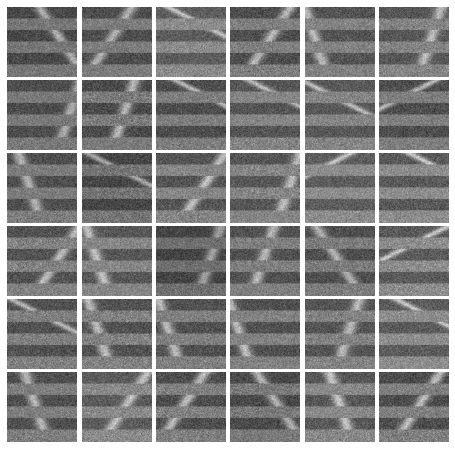

In [22]:
plt.subplots(6, 6, figsize=(8, 8))
h5_filename = '6_band_noise_30000.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([0,1,2,3,4,5])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb)))
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray')  
    plt.axis('off') 
hf.close()

## Processing the loss plots if needed

In [38]:
df1 = pd.read_csv('g_loss_clean.csv', header = None)
df2 = pd.read_csv('d_loss_clean.csv', header = None)

In [39]:
df1 = df1[df1[0]<10]

In [40]:
df2 = df2[df2[0]<10]

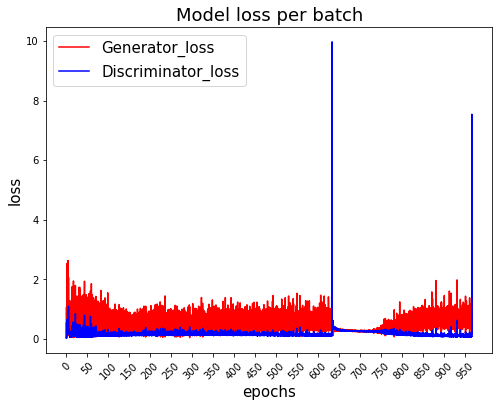

In [41]:
plt.figure(figsize=(8,6))
plt.plot(df1,color='red',label='Generator_loss')
plt.plot(df2,color='blue',label='Discriminator_loss')
plt.legend(fontsize = 15)
plt.xlabel('epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.title('Model loss per batch', fontsize = 18)
x = np.arange(0, 1000*31, 50*31)
labels = np.arange(0, 1000, 50)
plt.xticks(x, labels, rotation=45)
plt.savefig('lossplot.png')
plt.show()

## Cadence-RFI dataset (cadence dataset but with RFI in OFF)

In [34]:
%%time
# generating and saving clean

with h5py.File('6_band_noise_innoise_30000.h5', 'w') as hf:
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_width = np.random.uniform(50, 60)
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)

            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))
            frame2 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame2.add_signal(stg.simple_rfi_path(f_start=frame.get_frequency(index=np.random.uniform(0, 128)),
                                     drift_rate=0*u.Hz/u.s,
                                     spread=np.random.uniform(0, 30)*u.Hz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                                     stg.constant_t_profile(level=1),
                                     stg.box_f_profile(width=20*u.Hz),
                                     stg.constant_bp_profile(level=1))
            noise = frame2.add_noise(x_mean=0.5, x_std = 0.1, noise_type = np.random.choice(['normal', 'chi2']))
            frame3 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame3.add_signal(stg.simple_rfi_path(f_start=frame.get_frequency(index=np.random.uniform(0, 128)),
                                     drift_rate=0*u.Hz/u.s,
                                     spread=np.random.uniform(0, 30)*u.Hz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                                     stg.constant_t_profile(level=1),
                                     stg.box_f_profile(width=20*u.Hz),
                                     stg.constant_bp_profile(level=1))
            noise = frame3.add_noise(x_mean=0.5, x_std = 0.1, noise_type = np.random.choice(['normal', 'chi2']))
            frame4 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=23*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame4.add_signal(stg.simple_rfi_path(f_start=frame.get_frequency(index=np.random.uniform(0, 128)),
                                     drift_rate=0*u.Hz/u.s,
                                     spread=np.random.uniform(0, 30)*u.Hz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                                     stg.constant_t_profile(level=1),
                                     stg.box_f_profile(width=20*u.Hz),
                                     stg.constant_bp_profile(level=1))
            noise = frame4.add_noise(x_mean=0.5, x_std = 0.1, noise_type = np.random.choice(['normal', 'chi2']))
            filename = 'clean_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            img[21:42,:] = frame2.get_data().reshape(21,1,128)
            img[63:84,:] = frame3.get_data().reshape(21,1,128)
            img[105:,:] = frame4.get_data().reshape(23,1,128)
            hf.create_dataset(filename, data=img)
            
# generating and saving noisy
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_SNR = 50
            random_width = 50
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame.add_noise(x_mean=10, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=random_start),
                                                    drift_rate=random_drift*u.Hz/u.s),
                                      stg.constant_t_profile(level=frame.get_intensity(snr=random_SNR)),
                                      stg.gaussian_f_profile(width=random_width*u.Hz),
                                      stg.constant_bp_profile(level=1))
            frame2 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame2.add_signal(stg.simple_rfi_path(f_start=frame.get_frequency(index=np.random.uniform(0, 128)),
                                     drift_rate=0*u.Hz/u.s,
                                     spread=np.random.uniform(0, 30)*u.Hz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                                     stg.constant_t_profile(level=1),
                                     stg.box_f_profile(width=20*u.Hz),
                                     stg.constant_bp_profile(level=1))
            noise = frame2.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            frame3 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame3.add_signal(stg.simple_rfi_path(f_start=frame.get_frequency(index=np.random.uniform(0, 128)),
                                     drift_rate=0*u.Hz/u.s,
                                     spread=np.random.uniform(0, 30)*u.Hz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                                     stg.constant_t_profile(level=1),
                                     stg.box_f_profile(width=20*u.Hz),
                                     stg.constant_bp_profile(level=1))
            noise = frame3.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            frame4 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=23*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            signal = frame4.add_signal(stg.simple_rfi_path(f_start=frame.get_frequency(index=np.random.uniform(0, 128)),
                                     drift_rate=0*u.Hz/u.s,
                                     spread=np.random.uniform(0, 30)*u.Hz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                                     stg.constant_t_profile(level=1),
                                     stg.box_f_profile(width=20*u.Hz),
                                     stg.constant_bp_profile(level=1))
            noise = frame4.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            filename = 'noisy_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            img[21:42,:] = frame2.get_data().reshape(21,1,128)
            img[63:84,:] = frame3.get_data().reshape(21,1,128)
            img[105:,:] = frame4.get_data().reshape(23,1,128)
            hf.create_dataset(filename, data=img)
    
    hf.close() 

CPU times: user 4min 9s, sys: 12.3 s, total: 4min 22s
Wall time: 4min 25s


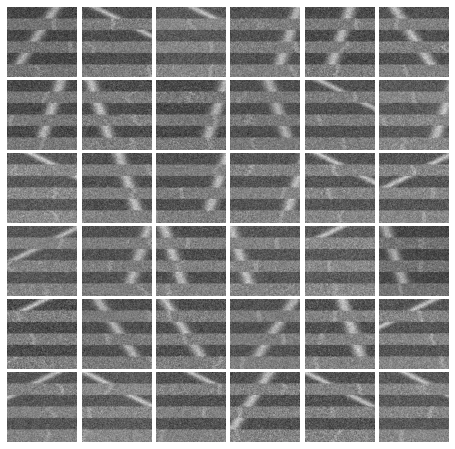

In [35]:
plt.subplots(6, 6, figsize=(8, 8))
h5_filename = '6_band_noise_innoise_30000.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([0,1,2,3,4,5])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb)))
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray')  
    plt.axis('off') 
hf.close()

## Noise background dataset

In [5]:
%%time
# generating and saving clean

with h5py.File('just_background.h5', 'w') as hf:
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            filename = 'clean_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            hf.create_dataset(filename, data=img)
            
# generating and saving noisy
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame.add_noise(x_mean=10, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            filename = 'noisy_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            hf.create_dataset(filename, data=img)
    
    hf.close() 

CPU times: user 1min 31s, sys: 11 s, total: 1min 42s
Wall time: 1min 44s


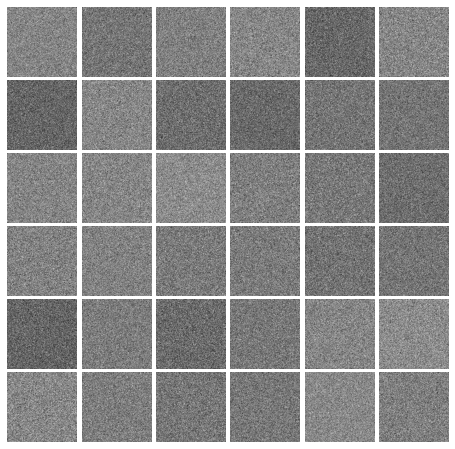

In [6]:
plt.subplots(6, 6, figsize=(8, 8))
h5_filename = 'just_background.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([0,1,2,3,4,5])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb)))
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray')  
    plt.axis('off') 
hf.close()

## Cadence background dataset

In [6]:
%%time
# generating and saving clean

with h5py.File('cadence_background.h5', 'w') as hf:
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            filename = 'clean_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            hf.create_dataset(filename, data=img)
            
# generating and saving noisy
    rd = -1
    for random_drift in [0.05, 0.1, 0.3, -0.3, -0.1, -0.05]:
        rd = rd+1
        for i in range(2500):
            random_SNR = 50
            random_width = 50
            if random_drift>0:
                random_start = np.random.uniform(-10, 70)
            else:      
                random_start = np.random.uniform(60, 140)
            frame = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=128*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame.add_noise(x_mean=10, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            frame2 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame2.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            frame3 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=21*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame3.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            frame4 = stg.Frame(fchans=128*u.pixel, # number of frequency samples
                          tchans=23*u.pixel, # number of time samples
                          df=2.7939677238464355*u.Hz, # frequency resolution
                          dt=18.253611008*u.s, # time resolution
                          fch1=6095.214842353016*u.MHz) # min/max frequency
            noise = frame4.add_noise(x_mean=12, x_std = 1, noise_type = np.random.choice(['normal', 'chi2']))
            filename = 'noisy_'+str(i+1)+'_'+str(rd)
            frame._update_waterfall()
            img = frame.waterfall.data
            img[21:42,:] = frame2.get_data().reshape(21,1,128)
            img[63:84,:] = frame3.get_data().reshape(21,1,128)
            img[105:,:] = frame4.get_data().reshape(23,1,128)
            hf.create_dataset(filename, data=img)
            
    
    hf.close() 

CPU times: user 2min 42s, sys: 12.9 s, total: 2min 55s
Wall time: 2min 56s


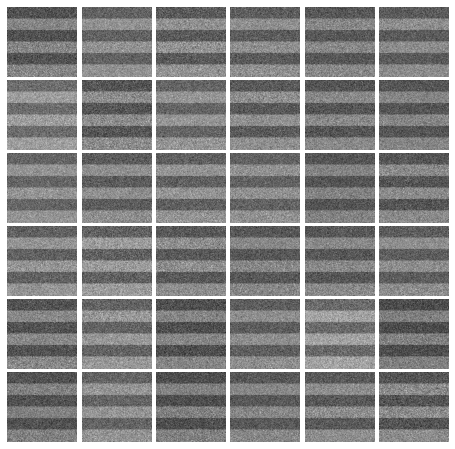

In [7]:
plt.subplots(6, 6, figsize=(8, 8))
h5_filename = 'cadence_background.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([0,1,2,3,4,5])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb)))
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray')  
    plt.axis('off') 
hf.close()

## Get data name files

In [ ]:
noisy_names = []
for rd in range(6):
    for i in range(2500):
        noisy_name = 'noisy_'+str(i+1)+'_'+str(rd)
        noisy_names.append(noisy_name)
clean_names = []
for rd in range(6):
    for i in range(2500):
        clean_name = 'clean_'+str(i+1)+'_'+str(rd)
        clean_names.append(clean_name)       

In [ ]:
pd.DataFrame(clean_names).to_csv('images_c.csv', index = False)
pd.DataFrame(noisy_names).to_csv('images_n.csv', index = False)